<a href="https://colab.research.google.com/github/Suchirapon/KKU_data_mining/blob/master/Kmean_Clutering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data
การสุ่ม data ขึ้นมาเอง

In [1]:
from sklearn.datasets import make_blobs
#make_blobs คือ สุ่มเดต้าขึ้นมาเป็นกลุ่มๆ

In [2]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [4]:
X.shape
#300แถว 2หลัก จากที่กำหนด n_samples=300 และ n_features=2

(300, 2)

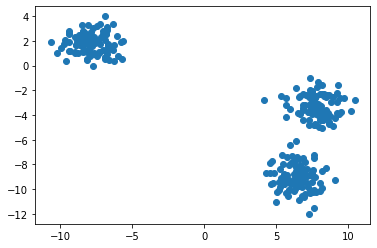

In [5]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])
#จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

# Import

In [6]:
from sklearn.cluster import KMeans

# Define 
กำหนดพารามิเตอร์

In [11]:
KMclust = KMeans(n_clusters=5)
# n_clusters=5 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่มเท่าไหร่

# Train
สร้างโมเดล

In [12]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Predict
ทำนาย

In [13]:
label = KMclust.predict(X)
# predict ว่าอยู่ในกลุ่มไหน

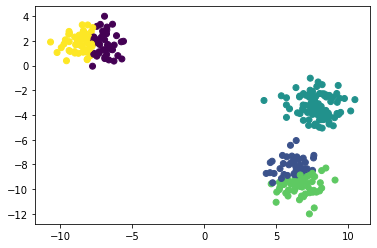

In [14]:
plt.scatter(X[:,0],X[:,1], c=label)
# เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม 

# Color
ทำการจัดกลุ่มสี เพื่อให้แทนค่าสีที่น้อยลง

In [15]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
path = '/content/drive/My Drive/DWDM_material'

In [29]:
import cv2
import os

In [34]:
img = cv2.imread(os.path.join(path,'boboon.jpg'))

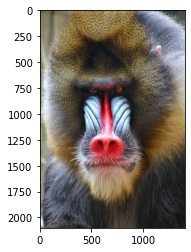

In [35]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [36]:
RGB_img.shape
#จำนวนแถว; จำนวนหลัก, มี 3 แผ่น Red green blue ผสมกัน

(2100, 1400, 3)

# Count unique colors
เช็คว่ามีทั้งหมดกี่สี

In [37]:
import numpy as np

In [38]:
np.unique(RGB_img).shape
#นับสีทั้งหมดว่ามีกี่สีที่ไม่ซ้ำกัน โดยใช้ np.unique

(256,)

# Use K-mean to reduce colors from 256 colors to 8 colors
จะทำให้เหลือแค่ 8 สี

In [40]:
#Define 
myQuantize = KMeans(n_clusters=8)

In [41]:
#Train
myQuantize.fit(RGB_img)

ValueError: ignored

### ตรง Train Error เพราะว่า ปกติจะมีแค่จำนวนแถวและคอลัม แต่ในที่นี้มีการเพิ่มจำนวน array 3 เข้ามา ซึ่งมันรับค่าได้แค่2ตัว ในปกติคือแถวและคอลัม จึงต้องทำการยุบรวมแถวและคอลัมให้เป็นอันเดียวกัน เพื่อที่จะอ่าน array ได้ 

In [42]:
img_row = np.reshape(RGB_img,(2100*1400, 3))
img_row

array([[111, 109,  88],
       [108, 106,  85],
       [113, 108,  86],
       ...,
       [ 23,  25,  20],
       [ 24,  26,  21],
       [ 25,  27,  22]], dtype=uint8)

In [43]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
#Predict
res = myQuantize.predict(img_row)

In [46]:
res

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

## Get cluster center
ค่าสีที่ควรจะเป็น ว่าสีที่ 1 2 3..... 8 ว่าควรจะเป็นสีอะไร

In [47]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[103.87363191, 105.52662167, 111.95655914],
       [157.45546354, 138.18144131, 108.08309955],
       [ 37.70615788,  34.61082016,  31.74981677],
       [205.35281736, 210.24687657, 225.13304885],
       [125.65876397, 100.09529484,  61.50212092],
       [164.30031265, 163.11765943, 166.8009891 ],
       [ 75.23475768,  64.83543708,  52.68043919],
       [193.65991818,  46.87772998,  54.74539739]])

In [48]:
Clus_cen.shape

(8, 3)

## Map color name back to image

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]



In [ ]:
new_img_ = new_img/255
#255 คือ ค่าสี 

In [ ]:
plt.imshow(new_img_)